In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from scipy.optimize import curve_fit
from scipy import stats

In [2]:
def load(data): # Loading the data from the excel
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[13:21,1:13]) # Specification of the cells that have the values we need; raw data     
    mean = df1.mean(0)
    mean2 = list(map(lambda x: x - mean[-1], mean)) 
    del mean2[-1]
    del mean2[0:4]
    return mean2

In [3]:
gain_reps = 11; conc_range = 7; concentration = []; col = []
arr_ = np.zeros((7, gain_reps))

for j in range(conc_range):
    initial = 10 / 2**4
    concentration_ = initial / 2**(j)
    concentration.append(concentration_)

for i in range(gain_reps):        
    a = 'C:\Clariostar\Writeup data\Fluostar data\\f Sulforhodamine 101 Gain '
    b = '.xlsx'
    gain = 50*i + 700
    c = a + str(gain) + b  
    
    col.append(gain)
    
    data_ = load(c)
    
    for x in range(len(data_)):
        arr_[x, i] = data_[x]

df = pd.DataFrame(arr_, index = concentration, columns = col)
print(df)

             700      750      800       850       900       950       1000  \
0.625000  399.250  606.625  895.125  1291.250  1820.625  2540.500  3457.750   
0.312500  142.875  215.250  316.875   456.500   640.625   890.750  1212.500   
0.156250   86.750  131.625  188.500   274.000   388.375   550.375   744.125   
0.078125   59.000   91.000  131.125   185.625   267.250   375.375   518.625   
0.039062   35.125   54.125   78.875   112.750   160.875   227.625   309.500   
0.019531   18.000   31.750   44.875    66.875    92.500   134.375   181.250   
0.009766    8.750   16.625   22.875    35.000    47.250    68.500    92.125   

              1050      1100      1150       1200  
0.625000  4648.375  6097.250  8093.875  10184.500  
0.312500  1618.000  2100.125  2798.125   3494.875  
0.156250   994.500  1313.625  1734.000   2231.375  
0.078125   695.500   928.375  1219.500   1568.750  
0.039062   420.750   562.250   739.375    935.125  
0.019531   241.625   322.125   426.500    552.500  
0.0

0.9994390846642529
0.9993527508895543
0.9997770217201769
0.9996343332435591
0.9992940571027635
0.999834153076287
0.9995167345355254


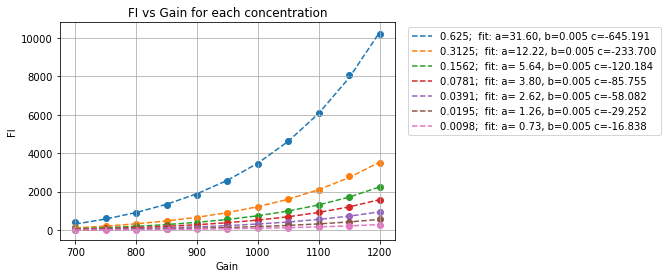

0.004977421989423446


In [4]:
def func(x, a, b, c):
    return a*np.exp(b*x) + c

popt5_alist = []
popt5_blist = []
popt5_clist = []

for i in range(df.shape[0]):
    x1 = df.columns
    y1 = df.iloc[i, :]

    plt.scatter(x1, y1)
    
    
    popt5, pcov5 = curve_fit(func, x1, y1, p0 = [1, 0.006, -50], maxfev = 30000)
#     print(np.round(popt1, 3))
    popt5_alist.append(popt5[0])
    popt5_blist.append(popt5[1])
    popt5_clist.append(popt5[2])
   

    plt.plot(x1, func(x1, *popt5), '--', label = str(round(initial*0.5**i, 4)) + ';  fit: a=%5.2f, b=%5.3f c=%5.3f'% tuple(popt5))

    residuals = y1 - func(x1, *popt5)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y1 - np.mean(y1))**2)
    r_squared = 1 - (ss_res/ss_tot)

    print(r_squared)    

plt.title("FI vs Gain for each concentration")
plt.xlabel('Gain')
plt.ylabel('FI')

plt.grid()
plt.legend(bbox_to_anchor = (1.025, 1), loc = 2)
plt.show()

bmean = np.mean(popt5_blist)
print(bmean)

[[  6.0335043  -33.53363663]
 [  5.96102624 -34.08638987]
 [  6.04496495 -35.14925922]
 [  6.10430976 -35.92199105]
 [  6.12088749 -36.54368036]
 [  6.23441267 -37.87425958]
 [  6.28075367 -38.85906406]] 
 (7, 2)


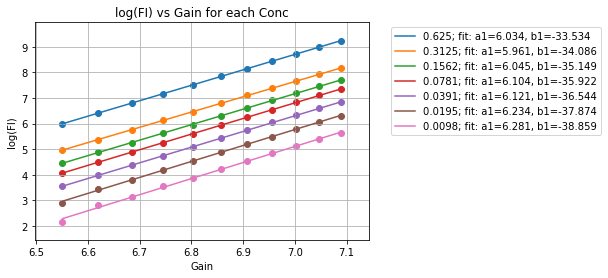

In [5]:
fit_array = np.zeros((0, 2))

for i in range(df.shape[0]):
    x1 = np.log(np.array(df.columns))
    y1 = np.log(np.array(df.iloc[i,:]))
    
    fit1 = np.polyfit(x1, y1, 1)
    fit1_list = [fit1]
    a1 = fit1[0]
    b1 = fit1[1]
    fit_equation = a1 * x1 + b1
    
    fit_array = np.append(fit_array, fit1_list, axis = 0)
    
    plt.scatter(x1, y1)
    plt.plot(x1, fit_equation, label = str(round(initial * 0.5**i, 4)) + '; fit: a1=%5.3f, b1=%5.3f' % tuple(fit1))

print(fit_array, "\n", fit_array.shape)


plt.title("log(FI) vs Gain for each Conc")
plt.xlabel("Gain")
# plt.xticks(x, col)
plt.ylabel("log(FI)")
# plt.legend(df.index, bbox_to_anchor=(1.05, 1), loc=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.grid()
plt.margins(0.10) 

plt.show()

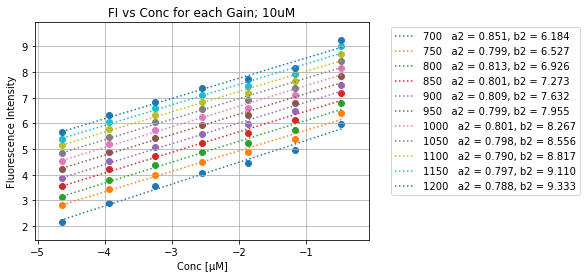

0.8043318965530819


In [6]:
fit2_array = np.zeros((0,2)); a2_list = []; b2_list = []
for i in range(df.shape[1]): 
    x2 = np.log(df.index)
    y2 = np.log(np.array(df.iloc[:, i]))   
    
    fit2 = np.polyfit(x2, y2, 1) # linear regression, generates y=mx+c as log(FI)=(B)Gain+log(a)
    a2 = fit2[0]
    b2 = fit2[1]
    fit2_equation = a2 * x2 + b2
    fit2_list = [fit2]
    
    fit2_array = np.append(fit2_array, fit2_list, axis = 0)
    a2_list.append(a2); b2_list.append(b2)
    
    plt.scatter(x2, y2)
    plt.plot(x2, fit2_equation, ':', label = str(50*i + 700) + '   a2 = %5.3f, b2 = %5.3f' % tuple(fit2))
    
    
plt.title('FI vs Conc for each Gain; 10uM')
plt.xlabel('Conc [µM]')
plt.ylabel('Fluorescence Intensity')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2)

plt.grid(); plt.margins(0.10) 
plt.show()
# print(fit2_array)

a2_array = np.array(a2_list)
a2_mean = np.mean(a2_array)
print(a2_mean)

36.311125767666226 0.0048437453376339945 -709.2456518234585 
 
 0.999266048916888


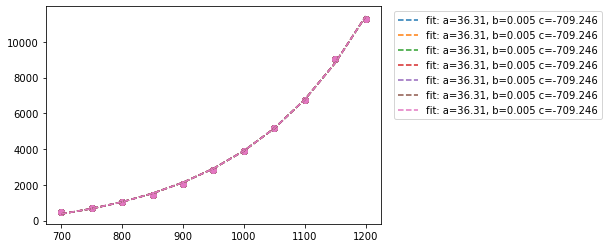

In [17]:
def func(x, a, b, c):
    return a*np.exp(b*x) + c


for i in range(df.shape[0]):
    m = df.columns
    delta = np.exp(b2_list)
    
    popt9, pcov9 = curve_fit(func, m, delta, p0 = [1, 0.006, -50], maxfev = 30000)

    plt.plot(m, func(m, *popt9), '--', label = 'fit: a=%5.2f, b=%5.3f c=%5.3f'% tuple(popt9))
    
    plt.scatter(m, delta)

plt.legend(bbox_to_anchor=(1.025, 1))
    

residuals_test1_1 = delta - func(m, *popt9)
ss_res1_1 = np.sum(residuals_test1_1**2)
ss_tot1_1 = np.sum((delta - np.mean(delta))**2)
r_squared1_1 = 1 - (ss_res1_1 / ss_tot1_1)
print(*popt9, '\n','\n', r_squared1_1)

                700         750         800          850          900   \
0.625000  252.585607  454.976183  712.828407  1041.340586  1459.875862   
0.312500  144.637388  260.531737  408.184934   596.299943   835.964626   
0.156250   82.823303  149.187559  233.737796   341.457566   478.696082   
0.078125   47.426876   85.428854  133.844619   195.527890   274.114397   
0.039062   27.157919   48.918885   76.643069   111.964588   156.965359   
0.019531   15.551363   28.012284   43.887906    64.113968    89.882634   
0.009766    8.905134   16.040596   25.131409    36.713402    51.469241   

                 950          1000         1050         1100         1150  \
0.625000  1993.103513  2672.453006  3537.966512  4640.659067  6045.525502   
0.312500  1141.305282  1530.319280  2025.935854  2657.367604  3461.832336   
0.156250   653.542447   876.302443  1160.105974  1521.680968  1982.339354   
0.078125   374.236181   501.794613   664.308234   871.355911  1135.141432   
0.039062   214.297816 

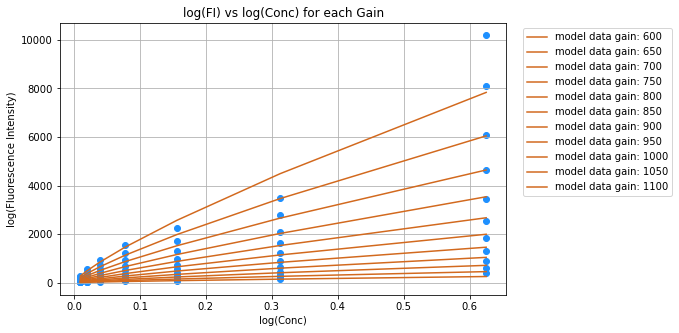

In [13]:
model = list(df.index)
model = np.array(model, dtype = float); model_array = []; index_gain = []


for gn in range(gain_reps): 
    gain = 50*gn + 700
    result = list(map(lambda uM: (popt9[0]*np.exp(popt9[1]*gain)+popt9[2])*uM**(a2_mean), model))
    model_array.append(result)
    index_gain.append(gain)


model_df = pd.DataFrame(model_array, index = index_gain, columns = model)
model_df = model_df.T # transpose df
print(model_df)

plt.figure(figsize=(8,5))

for i in range(df.shape[1]):
    gain = 50*i + 600
  
    x = df.index
    y = df.iloc[:, i]
    
    x_model = model_df.index
    y_model = model_df.iloc[:, i]
    
    plt.scatter(x, y, c = 'dodgerblue')
    plt.plot(x_model, y_model, linewidth = 1.5, c = 'chocolate', label = 'model data gain: %2.0f' % gain)


plt.title('log(FI) vs log(Conc) for each Gain'); plt.xlabel('log(Conc)'); plt.ylabel('log(Fluorescence Intensity)')
plt.legend(bbox_to_anchor = (1.025, 1)); plt.grid()
    
plt.show()

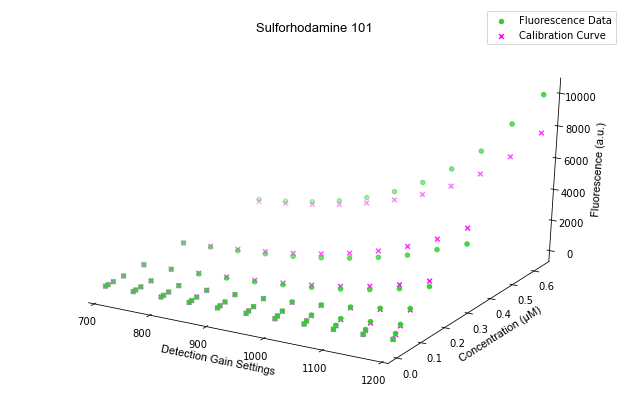

In [15]:
fig = plt.figure(figsize=(11,7))
ax = plt.axes(projection='3d')

x,y = np.meshgrid(df.columns, df.index)
X,Y = np.meshgrid(model_df.columns, model_df.index)
z1 = np.array(df.values)
z2 = np.array(model_df.values)

ax.scatter3D(x, y, z1, label = 'Fluorescence Data', s=20, c='limegreen', marker='o')
ax.scatter3D(X, Y, z2, label = 'Calibration Curve', s=22, c='magenta', marker='x')

ax.set_title('Sulforhodamine 101', fontname="Arial", fontsize=13)
ax.set_xlabel('Detection Gain Settings', fontname="Arial", fontsize=11)
ax.set_ylabel('Concentration (\u03BCM)', fontname="Arial", fontsize=11)
ax.set_zlabel('Fluorescence (a.u.)', fontname="Arial", fontsize=11)
ax.legend(loc=1)

# plt.rc('grid', linestyle=":", color='grey'); #ax.set_xticklabels(df.columns, fontsize=9.5); 
ax.grid(False)
ax.set_xlim(700,1200)

ax.xaxis.pane.fill = False; ax.yaxis.pane.fill = False; ax.zaxis.pane.fill = False
# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w'); ax.yaxis.pane.set_edgecolor('w'); ax.zaxis.pane.set_edgecolor('w')

plt.savefig('Fluostar Sulforhodamine 101 3D.png', dpi=300)

plt.show()

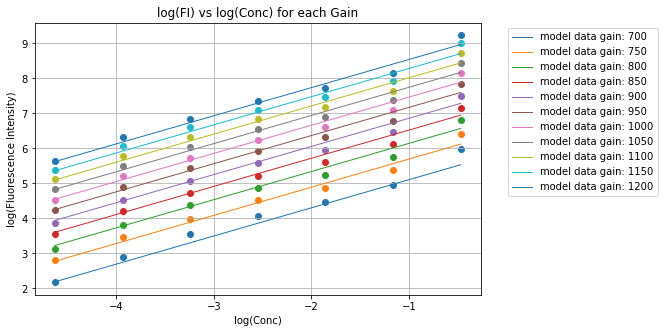

Model dataframe: 
 
                 700         750         800          850          900   \
0.625000  252.585607  454.976183  712.828407  1041.340586  1459.875862   
0.312500  144.637388  260.531737  408.184934   596.299943   835.964626   
0.156250   82.823303  149.187559  233.737796   341.457566   478.696082   
0.078125   47.426876   85.428854  133.844619   195.527890   274.114397   
0.039062   27.157919   48.918885   76.643069   111.964588   156.965359   
0.019531   15.551363   28.012284   43.887906    64.113968    89.882634   
0.009766    8.905134   16.040596   25.131409    36.713402    51.469241   

                 950          1000         1050         1100         1150  \
0.625000  1993.103513  2672.453006  3537.966512  4640.659067  6045.525502   
0.312500  1141.305282  1530.319280  2025.935854  2657.367604  3461.832336   
0.156250   653.542447   876.302443  1160.105974  1521.680968  1982.339354   
0.078125   374.236181   501.794613   664.308234   871.355911  1135.141432   
0

In [12]:
plt.figure(figsize=(8,5))
for i in range(df.shape[1]):
    gain = 50*i + 700
    
    x = np.log(df.index)
    y = np.log(df.iloc[:, i])
    
    x_model = np.log(model_df.index)
    y_model = np.log(model_df.iloc[:, i])
    
    plt.scatter(x, y)
    plt.plot(x_model, y_model, linewidth = 1, label = 'model data gain: %2.0f' % gain)


plt.title('log(FI) vs log(Conc) for each Gain'); plt.xlabel('log(Conc)'); plt.ylabel('log(Fluorescence Intensity)')
plt.legend(bbox_to_anchor = (1.05, 1)); plt.grid()
    
plt.show()
print('Model dataframe:', "\n", "\n", model_df)